In [189]:
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


In [190]:
df = pd.read_csv('Test Data.csv')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_date  100000 non-null  object 
 1   property_id       100000 non-null  int64  
 2   property_type     100000 non-null  object 
 3   region            100000 non-null  object 
 4   price             100000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.8+ MB


In [192]:
df['transaction_date'] =  pd.to_datetime(df['transaction_date'], format='%Y-%m-%d')

In [193]:
df.head()

,transaction_date,property_id,property_type,region,price
0,2020-01-01,512624,Condo,Metro Vancouver,812353.75
1,2020-01-01,499817,Condo,Nanaimo,261333.66
2,2020-01-01,388958,Townhouse,Central Okanagan,744377.10
3,2020-01-01,708544,Townhorse,Nanaimo,555737.79
4,2020-01-01,227012,Single Family Dwelling,Metro Vancouver,1186354.04


In [194]:
#for col in df:
print(df['region'].unique())

['Metro Vancouver' 'Nanaimo' 'Central Okanagan' 'Fraser Valley'
 'Thompson-Nicola' 'Capital' 'Cappital']


In [195]:
df["region"].replace({"Cappital": "Capital"}, inplace=True)

In [196]:
print(df['region'].unique())

['Metro Vancouver' 'Nanaimo' 'Central Okanagan' 'Fraser Valley'
 'Thompson-Nicola' 'Capital']


In [197]:
print(df['property_type'].unique())

['Condo' 'Townhouse' 'Townhorse' 'Single Family Dwelling']


In [198]:
df["property_type"].replace({"Townhorse": "Townhouse"}, inplace=True)

In [199]:
print(df['property_type'].unique())

['Condo' 'Townhouse' 'Single Family Dwelling']


In [200]:
dfs = df.groupby(['property_id']).size().reset_index(name='cnt')

In [201]:
dfs = dfs[dfs['cnt'] > 1]

In [202]:
dfs.reset_index(inplace=True, drop=True)
dfs[:200]

,property_id,cnt
0,100063,2
1,100113,2
2,100260,5
3,100266,3
4,100306,2
...,...,...
195,107735,2
196,107965,2
197,108019,2
198,108022,4


In [203]:
# result_template = dict(transaction_date=[], property_id=[], property_type=[], region=[], price=[])
cols = ['property_id', 'property_type', 'region', 'transction_date_1', 'price_1', 'transaction_date_2', 'price_2', 'date_diff']
pairs_30 = pd.DataFrame(columns=cols)
pairs_90 = pairs_30.copy()
pairs_180 = pairs_30.copy()
for index, row in tqdm(dfs.iterrows(), total=dfs.shape[0]):
    pid = row['property_id']
    subset = df[df['property_id'] == pid]
    subset.reset_index(inplace=True, drop=True)
    for i, r in subset.iterrows():
        for j in range(i + 1, len(subset)):
            date_diff = subset.iloc[j, 0] - r['transaction_date']
            date_diff = date_diff.days
            lst = [r['property_id'], r['property_type'], r['region'], r['transaction_date'], r['price'], subset.iloc[j, 0], subset.iloc[j, 4], date_diff]
            log_row = pd.Series(lst, index=cols)
            if (date_diff <= 30):
                pairs_30 = pairs_30.append(log_row, ignore_index=True)
            if (date_diff <= 90):
                pairs_90 = pairs_90.append(log_row, ignore_index=True)
            if (date_diff <= 180):
                pairs_180 = pairs_180.append(log_row, ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████| 8325/8325 [00:18<00:00, 440.25it/s]


In [204]:
pairs_30.to_csv('pairs_30.csv')
pairs_90.to_csv('pairs_90.csv')
pairs_180.to_csv('pairs_180.csv')

In [205]:
pairs_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   property_id         200 non-null    object        
 1   property_type       200 non-null    object        
 2   region              200 non-null    object        
 3   transction_date_1   200 non-null    datetime64[ns]
 4   price_1             200 non-null    float64       
 5   transaction_date_2  200 non-null    datetime64[ns]
 6   price_2             200 non-null    float64       
 7   date_diff           200 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 12.6+ KB


In [206]:
pairs_90.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   property_id         566 non-null    object        
 1   property_type       566 non-null    object        
 2   region              566 non-null    object        
 3   transction_date_1   566 non-null    datetime64[ns]
 4   price_1             566 non-null    float64       
 5   transaction_date_2  566 non-null    datetime64[ns]
 6   price_2             566 non-null    float64       
 7   date_diff           566 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 35.5+ KB


In [207]:
pairs_180.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   property_id         1110 non-null   object        
 1   property_type       1110 non-null   object        
 2   region              1110 non-null   object        
 3   transction_date_1   1110 non-null   datetime64[ns]
 4   price_1             1110 non-null   float64       
 5   transaction_date_2  1110 non-null   datetime64[ns]
 6   price_2             1110 non-null   float64       
 7   date_diff           1110 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 69.5+ KB


In [208]:
pairs_180.head()

,property_id,property_type,region,transction_date_1,price_1,transaction_date_2,price_2,date_diff
0,100260,Single Family Dwelling,Capital,2023-01-25,1170733.35,2023-02-04,1172434.01,10
1,100260,Single Family Dwelling,Capital,2027-04-02,1461455.99,2027-04-11,1463366.53,9
2,100312,Condo,Metro Vancouver,2022-05-25,1088229.22,2022-07-03,1094395.27,39
3,100412,Single Family Dwelling,Metro Vancouver,2027-08-24,2159304.15,2027-11-24,2199860.77,92
4,100917,Condo,Capital,2028-03-16,1020804.42,2028-07-12,1044345.60,118


In [209]:
pairs_180['year'] = pairs_180['transction_date_1'].dt.year

In [210]:
pairs_180['month'] = pairs_180['transction_date_1'].dt.month

In [212]:
df180 = pairs_180['transction_date_1'].groupby([pairs_180.year, pairs_180.month]).agg({'count'})

In [213]:
df180.head()

count
year month       
2020 1          4
     2          5
     3          3
     4         10
     5          5

In [214]:
df180.reset_index(level=['year', 'month'])


,year,month,count
0,2020,1,4
1,2020,2,5
2,2020,3,3
3,2020,4,10
4,2020,5,5
...,...,...,...
115,2029,8,13
116,2029,9,13
117,2029,10,7
118,2029,11,3


<AxesSubplot:xlabel='year', ylabel='count'>

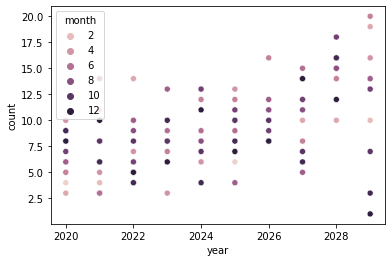

In [215]:
sns.scatterplot(x = "year", y = "count", data = df180, hue = "month")


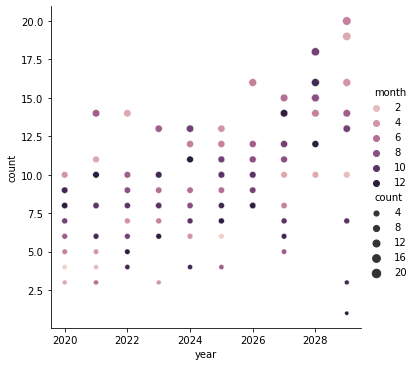

In [216]:
sns.relplot(x = "year", y = "count", data = df180, hue = "month", kind="scatter", 
            size="count")

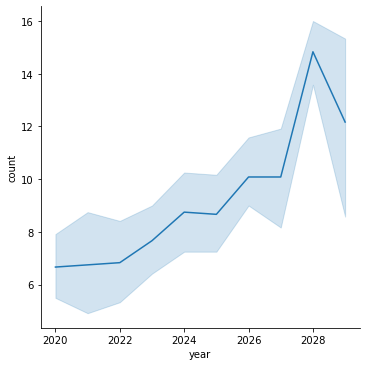

In [217]:
sns.relplot(x="year", y = "count", data = df180, kind = 'line')

In [219]:
df180_type.reset_index(level=['property_type'])

,property_type,count
year,,
2020,Condo,34
2020,Single Family Dwelling,25
2020,Townhouse,21
2021,Condo,31
2021,Single Family Dwelling,26
2021,Townhouse,24
2022,Condo,41
2022,Single Family Dwelling,17
2022,Townhouse,24


In [220]:
df180_type1 = pairs_180['transction_date_1'].groupby([pairs_180.property_type]).agg({'count'})

In [221]:

df180_type1.reset_index(level=['property_type'])




,property_type,count
0,Condo,509
1,Single Family Dwelling,304
2,Townhouse,297


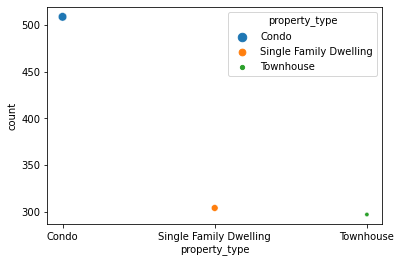

In [223]:
sns.scatterplot(x = "property_type", y = "count", data = df180_type1, hue = "property_type", size="property_type")


# Display plot
plt.show()

In [224]:
df180_reigon = pairs_180['transction_date_1'].groupby([pairs_180.year, pairs_180.region]).agg({'count'})

In [225]:
df180_reigon.head()

count
year region                 
2020 Capital              15
     Central Okanagan      5
     Fraser Valley         2
     Metro Vancouver      46
     Nanaimo               7

In [226]:
df180_reigon1 = pairs_180['transction_date_1'].groupby([pairs_180.region]).agg({'count'})

In [227]:
df180_reigon1.reset_index(level=['region'])


,region,count
0,Capital,153
1,Central Okanagan,66
2,Fraser Valley,74
3,Metro Vancouver,644
4,Nanaimo,99
5,Thompson-Nicola,74


<AxesSubplot:xlabel='region', ylabel='count'>

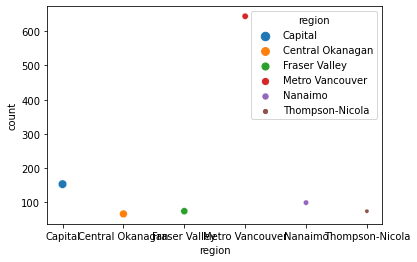

In [228]:
sns.scatterplot(x = "region", y = "count", data = df180_reigon1, hue = "region", size="region")


In [229]:
df180_type2 = pairs_180['transction_date_1'].groupby([pairs_180.region,pairs_180.property_type]).agg({'count'})

In [230]:
df180_type2

count
region           property_type                
Capital          Condo                      64
                 Single Family Dwelling     35
                 Townhouse                  54
Central Okanagan Condo                      32
                 Single Family Dwelling     14
                 Townhouse                  20
Fraser Valley    Condo                      34
                 Single Family Dwelling     19
                 Townhouse                  21
Metro Vancouver  Condo                     294
                 Single Family Dwelling    187
                 Townhouse                 163
Nanaimo          Condo                      48
                 Single Family Dwelling     29
                 Townhouse                  22
Thompson-Nicola  Condo                      37
                 Single Family Dwelling     20
                 Townhouse                  17

In [244]:
df.groupby('property_type', as_index=False)['price'].mean()

,property_type,price
0,Condo,9.478559e+05
1,Single Family Dwelling,1.302439e+06
2,Townhouse,1.183510e+06
